In [8]:
import json
import pandas as pd
import seaborn as sns

In [2]:
train_data = list()

for n in range(2):
    num = 0
    with open(f'/content/drive/MyDrive/최종프로젝트_7조/dataset/train_features_{n}.jsonl') as file:
        while True:
            line = file.readline()
            if not line:
                break
            line_json = json.loads(line)
            train_data.append(line_json)
            num += 1
            if num % 100 == 0:
                print(f'\r{num}', end='')
        print(f'\rjsonl{n} : {num}')
        print()

jsonl0 : 50000

jsonl1 : 170000



In [3]:
table = {'sha256': list(), 'label': list(), 'entropy': list()}
for line_json in train_data:
    table['sha256'].append(line_json['sha256'])
    table['label'].append(line_json['label'])
    entropy = list()
    for sec in line_json['section']['sections']:
        entropy.append(round(sec['entropy'], 4))
    table['entropy'].append(entropy)

df = pd.DataFrame(table)
df

,sha256,label,entropy
0,0abb4fda7d5b13801d63bee53e5e256be43e141faa077a...,0,"[6.5322, 5.4331, 1.7424, -0.0, 5.0209]"
1,d4206650743b3d519106dea10a38a55c30467c3d9f7875...,0,"[-0.0, 7.9237, 4.1467]"
2,c9cafff8a596ba8a80bafb4ba8ae6f2ef3329d95b85f15...,0,"[6.8229, 6.2047, 3.6912]"
3,7f513818bcc276c531af2e641c597744da807e21cc1160...,0,"[6.5993, 4.1286, -0.0, 4.6462, -0.0, 2.0491, -..."
4,ca65e1c387a4cc9e7d8a8ce12bf1bcf9f534c9032b9d95...,0,"[6.5914, 4.0991, 7.9861]"
...,...,...,...
219995,fffc51db2f5f45159284276ee900312b3893839390ae90...,0,"[2.5413, 3.0952, 0.4138]"
219996,fffd336fde879a1f402d7f9511eb94c428ae8efe1d7dec...,-1,"[6.5257, 0.4336, 4.4135, 6.8946]"
219997,fffe69f9736830997c67344c552da81a4ac403ea2c67ed...,0,"[3.3274, 5.5615, 6.5925, 5.4939]"
219998,fffe936a25e2cafbe1e5fa6c34eb272da7151e184b28a9...,-1,"[5.3224, 6.1916, 1.7695, 4.5162, 5.0674]"


In [6]:
df['count_entropy'] = df['entropy'].map(lambda x: len(x))
df['count_0_entropy'] = df['entropy'].map(lambda x: sum(map(lambda y: 1 if y == 0 else 0, x)))
df['mean_entropy'] = df['entropy'].map(lambda x: (sum(x) / len(x)) if len(x) != 0 else -1)
df['max_entropy'] = df['entropy'].map(lambda x: max(x) if len(x) != 0 else -1)
df

,sha256,label,entropy,count_entropy,count_0_entropy,mean_entropy,max_entropy
0,0abb4fda7d5b13801d63bee53e5e256be43e141faa077a...,0,"[6.5322, 5.4331, 1.7424, -0.0, 5.0209]",5,1,3.745720,6.5322
1,d4206650743b3d519106dea10a38a55c30467c3d9f7875...,0,"[-0.0, 7.9237, 4.1467]",3,1,4.023467,7.9237
2,c9cafff8a596ba8a80bafb4ba8ae6f2ef3329d95b85f15...,0,"[6.8229, 6.2047, 3.6912]",3,0,5.572933,6.8229
3,7f513818bcc276c531af2e641c597744da807e21cc1160...,0,"[6.5993, 4.1286, -0.0, 4.6462, -0.0, 2.0491, -...",8,3,2.720425,6.5993
4,ca65e1c387a4cc9e7d8a8ce12bf1bcf9f534c9032b9d95...,0,"[6.5914, 4.0991, 7.9861]",3,0,6.225533,7.9861
...,...,...,...,...,...,...,...
219995,fffc51db2f5f45159284276ee900312b3893839390ae90...,0,"[2.5413, 3.0952, 0.4138]",3,0,2.016767,3.0952
219996,fffd336fde879a1f402d7f9511eb94c428ae8efe1d7dec...,-1,"[6.5257, 0.4336, 4.4135, 6.8946]",4,0,4.566850,6.8946
219997,fffe69f9736830997c67344c552da81a4ac403ea2c67ed...,0,"[3.3274, 5.5615, 6.5925, 5.4939]",4,0,5.243825,6.5925
219998,fffe936a25e2cafbe1e5fa6c34eb272da7151e184b28a9...,-1,"[5.3224, 6.1916, 1.7695, 4.5162, 5.0674]",5,0,4.573420,6.1916


In [18]:
df_label_m1 = df[df['label'] == -1]
df_label0 = df[df['label'] == 0]
df_label1 = df[df['label'] == 1]
print(len(df_label_m1.index), len(df_label0.index), len(df_label1.index))

60000 100000 60000


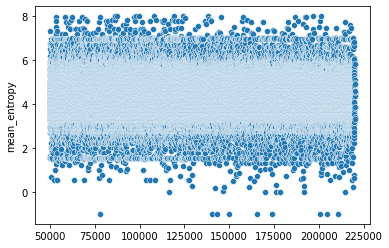

In [19]:
sns.scatterplot(x=df_label_m1.index, y='mean_entropy', data=df_label_m1)

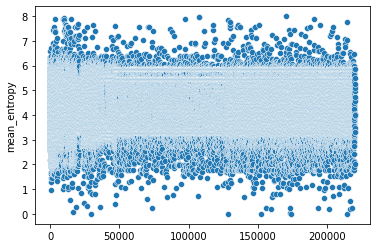

In [14]:
sns.scatterplot(x=df_label0.index, y='mean_entropy', data=df_label0)

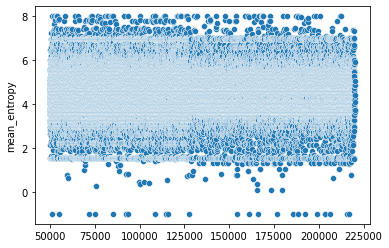

In [13]:
sns.scatterplot(x=df_label1.index, y='mean_entropy', data=df_label1)

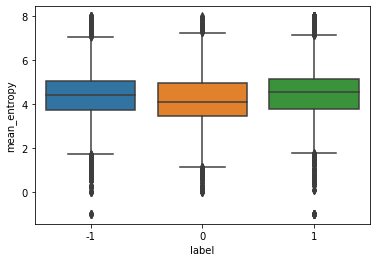

In [17]:
sns.boxplot(x='label', y='mean_entropy', data=df)